# HOW TO ADD A NEW CLASS TO OBJECT DETECTION PIPELINE?

In [1]:
## Uncomment command below to kill current job:
#!neuro kill $(hostname)

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
from detection.model import get_model
from detection.coco_subset import CLS_SELECT, COLORS, N_COCO_CLASSES
from detection.dataset import get_transform
from detection.visualisation import show_legend, predict_and_show
from detection.train import train
import torch
from pathlib import Path
from random import choice
from PIL import Image
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

## Downloading the dataset

In [6]:
! [ ! -f ../data/coco-retail.zip ] && wget http://data.neu.ro/coco-retail.zip -O ../data/coco-retail.zip

--2020-04-30 14:44:14--  http://data.neu.ro/coco-retail.zip
Resolving data.neu.ro (data.neu.ro)... 52.216.200.90
Connecting to data.neu.ro (data.neu.ro)|52.216.200.90|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 338292732 (323M) [application/zip]
Saving to: ‘../data/coco-retail.zip’

../data/coco-retail 100%[===================>] 322.62M  25.2MB/s    in 14s     

2020-04-30 14:44:28 (22.8 MB/s) - ‘../data/coco-retail.zip’ saved [338292732/338292732]



In [9]:
! [ ! -d ../data/coco ] && unzip ../data/coco-retail.zip -d ../data

Archive:  ../data/coco-retail.zip
   creating: ../data/coco/
   creating: ../data/coco/weights/
  inflating: ../data/coco/weights/24_classes.ckpt  
  inflating: ../data/coco/weights/25_classes.ckpt  
   creating: ../data/coco/mini_coco/
   creating: ../data/coco/mini_coco/train/
   creating: ../data/coco/mini_coco/train/annots/
  inflating: ../data/coco/mini_coco/train/annots/000000185633.jsonl  
  inflating: ../data/coco/mini_coco/train/annots/000000411303.jsonl  
  inflating: ../data/coco/mini_coco/train/annots/000000174623.jsonl  
  inflating: ../data/coco/mini_coco/train/annots/000000163234.jsonl  
  inflating: ../data/coco/mini_coco/train/annots/000000398554.jsonl  
  inflating: ../data/coco/mini_coco/train/annots/000000208262.jsonl  
  inflating: ../data/coco/mini_coco/train/annots/000000187933.jsonl  
  inflating: ../data/coco/mini_coco/train/annots/000000213103.jsonl  
  inflating: ../data/coco/mini_coco/train/annots/000000425242.jsonl  
  inflating: ../data/coco/mini_coco/trai

  inflating: ../data/coco/mini_coco/train/images/000000015156.jpg  
  inflating: ../data/coco/mini_coco/train/images/000000058731.jpg  
  inflating: ../data/coco/mini_coco/train/images/000000384231.jpg  
  inflating: ../data/coco/mini_coco/train/images/000000381629.jpg  
  inflating: ../data/coco/mini_coco/train/images/000000279541.jpg  
  inflating: ../data/coco/mini_coco/train/images/000000013720.jpg  
  inflating: ../data/coco/mini_coco/train/images/000000411303.jpg  
  inflating: ../data/coco/mini_coco/train/images/000000152769.jpg  
  inflating: ../data/coco/mini_coco/train/images/000000357865.jpg  
  inflating: ../data/coco/mini_coco/train/images/000000193041.jpg  
  inflating: ../data/coco/mini_coco/train/images/000000371042.jpg  
  inflating: ../data/coco/mini_coco/train/images/000000395893.jpg  
  inflating: ../data/coco/mini_coco/train/images/000000159400.jpg  
  inflating: ../data/coco/mini_coco/train/images/000000224692.jpg  
  inflating: ../data/coco/mini_coco/train/images

  inflating: ../data/coco/mini_coco/val/annots/000000210957.jsonl  
  inflating: ../data/coco/mini_coco/val/annots/000000229295.jsonl  
  inflating: ../data/coco/mini_coco/val/annots/000000333181.jsonl  
  inflating: ../data/coco/mini_coco/val/annots/000000109114.jsonl  
  inflating: ../data/coco/mini_coco/val/annots/000000436195.jsonl  
  inflating: ../data/coco/mini_coco/val/annots/000000478892.jsonl  
  inflating: ../data/coco/mini_coco/val/annots/000000350231.jsonl  
  inflating: ../data/coco/mini_coco/val/annots/000000308543.jsonl  
  inflating: ../data/coco/mini_coco/val/annots/000000347407.jsonl  
  inflating: ../data/coco/mini_coco/val/annots/000000209027.jsonl  
  inflating: ../data/coco/mini_coco/val/annots/000000027901.jsonl  
  inflating: ../data/coco/mini_coco/val/annots/000000018633.jsonl  
  inflating: ../data/coco/mini_coco/val/annots/000000073066.jsonl  
  inflating: ../data/coco/mini_coco/val/annots/000000231845.jsonl  
  inflating: ../data/coco/mini_coco/val/annots/0

  inflating: ../data/coco/mini_coco/val/images/000000016823.jpg  
  inflating: ../data/coco/mini_coco/val/images/000000333020.jpg  
  inflating: ../data/coco/mini_coco/val/images/000000498588.jpg  
  inflating: ../data/coco/mini_coco/val/images/000000195058.jpg  
  inflating: ../data/coco/mini_coco/val/images/000000083014.jpg  
  inflating: ../data/coco/mini_coco/val/images/000000208262.jpg  
  inflating: ../data/coco/mini_coco/val/images/000000187933.jpg  
  inflating: ../data/coco/mini_coco/val/images/000000018633.jpg  
  inflating: ../data/coco/mini_coco/val/images/000000283118.jpg  
  inflating: ../data/coco/mini_coco/val/images/000000333181.jpg  
  inflating: ../data/coco/mini_coco/val/images/000000210957.jpg  
  inflating: ../data/coco/mini_coco/val/images/000000435152.jpg  
  inflating: ../data/coco/mini_coco/val/images/000000331392.jpg  
  inflating: ../data/coco/mini_coco/val/images/000000016030.jpg  
  inflating: ../data/coco/mini_coco/val/images/000000109114.jpg  
  inflatin

## Dataset overview

We took **25 classes** from COCO-dataset which can be seen on the shelves as retail products.
Since our goal is show how new category can be added to detection pipeline 
(without long training process), 
we work with only 100 photos and don't make any train/val split. 
Of course, with these settings, the model will be prone to over-fitting, 
but training on the whole dataset will take too much time.

In [10]:
data_dir = Path('../data/coco/mini_coco/')

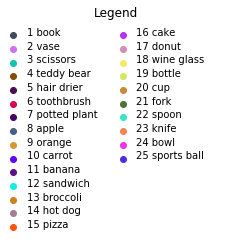

In [11]:
show_legend(list(CLS_SELECT.keys()), COLORS)

## Evaluation of model, trained on 24 classes

Let's load our model, trained on 24 classes (without class #25 - **sport ball**).

In [12]:
path_to_ckpt = '../data/coco/weights/24_classes.ckpt'

model = get_model(n_classes=N_COCO_CLASSES - 1)
model.load_state_dict(torch.load(path_to_ckpt))
model.eval();

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 89.6MB/s]


Now let's make sure that the model can't recognize the 25'th class.

In [13]:
def get_im_with_extra_class():

    images_with_extra_class = [
        '000000091595.jpg', '000000331474.jpg', '000000371042.jpg',
        '000000209027.jpg', '000000032611.jpg', '000000002139.jpg',
        '000000050407.jpg', '000000345466.jpg', '000000465530.jpg'
    ]
    
    im_path = data_dir / 'train' / 'images' / choice(images_with_extra_class)
    
    im_pil = Image.open(im_path)
    im_tensor, _ = get_transform(False)(im_pil, None)
    
    print(im_path.name)
    return im_pil, im_tensor

000000050407.jpg


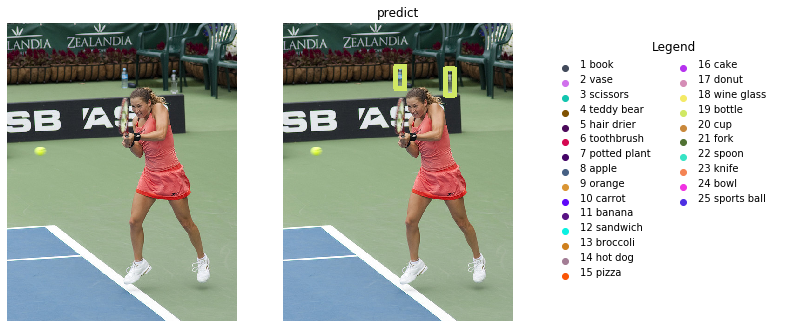

In [14]:
im_pil, im_tensor = get_im_with_extra_class()

predict_and_show(model.cuda(), im_pil, im_tensor.cuda())

## Add 25'th class

The simplest way to add new classes includes 2 steps:
* Increasing the number of output logits; 
* Training / fine-tuning process.

In [15]:
# Now we can train our model or load it from prepared checkpoint

want_finetune = False

if want_finetune:
    # fine-tune previous model
    model_ext = get_model(n_classes=N_COCO_CLASSES - 1)
    model_ext.load_state_dict(torch.load(path_to_ckpt))
    n_features = model_ext.roi_heads.box_predictor.cls_score.in_features
    model_ext.roi_heads.box_predictor = FastRCNNPredictor(n_features, N_COCO_CLASSES)
    
    train(model=model_ext, data_dir=data_dir, prev_ckpt=None, n_epoch=50,
          batch_size=2, n_workers=4, ignore_labels=(), need_save=False)

else:
    # load from ckpt
    path_to_ckpt_ext = '../data/coco/weights/25_classes.ckpt'
    model_ext = get_model(n_classes=N_COCO_CLASSES)
    model_ext.load_state_dict(torch.load(path_to_ckpt_ext))
    

Let's check that our model can now recognize the added 25'th class.

000000465530.jpg


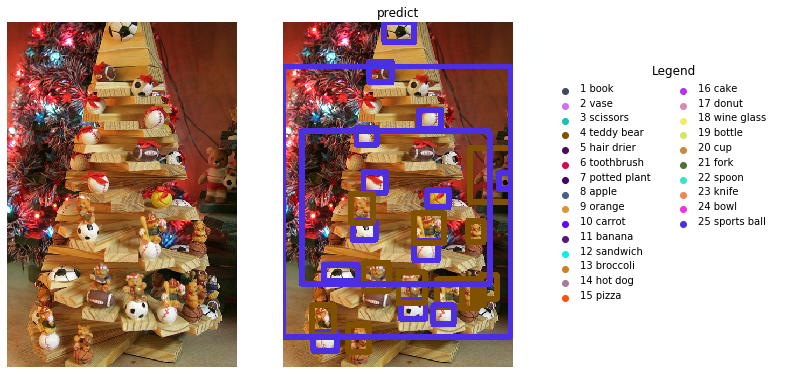

In [17]:
model_ext.cuda()

im_pil, im_tensor = get_im_with_extra_class()

predict_and_show(model_ext.cuda(), im_pil, im_tensor.cuda())